In [1]:
# import nltk
# nltk.download()

In [2]:
#  한글 형태소 분석기를 이용해 형태소 분석하는 방법
# Kkma
from konlpy.tag import Kkma

In [3]:
a = Kkma()
nouns = a.nouns ('명사만을 추출합니다. 형태소 분석입니다.')
print(nouns)

/Users/jungseolee/anaconda3/lib/python3.7/site-packages/jpype/_core.py:210: UserWarning: 
-------------------------------------------------------------------------------
Deprecated: convertStrings was not specified when starting the JVM. The default
behavior in JPype will be False starting in JPype 0.8. The recommended setting
for new code is convertStrings=False.  The legacy value of True was assumed for
this session. If you are a user of an application that reported this warning,
please file a ticket with the developer.
-------------------------------------------------------------------------------

  """)


['명사', '추출', '형태소', '분석']


In [4]:
# Twitter
from konlpy.tag import Twitter
nlp = Twitter()

nouns = nlp.nouns ('명사만을 추출합니다. 형태소 분석입니다')
print(nouns)

/Users/jungseolee/anaconda3/lib/python3.7/site-packages/konlpy/tag/_okt.py:16: UserWarning: "Twitter" has changed to "Okt" since KoNLPy v0.4.5.
  warn('"Twitter" has changed to "Okt" since KoNLPy v0.4.5.')


['명사', '추출', '형태소', '분석']


In [5]:
# Okt : 형태소 분석과 품사 분석

from konlpy.tag import Okt #Twitter 
okt = Okt()


print(okt.morphs('단독입찰보다 복수입찰의 경우')) #['단독', '입찰', '보다', '복수', '입찰', '의', '경우']
print(okt.nouns('유일하게 항공기 체계 종합개발 경험을 갖고 있는 KAI 는')) #['항공기', '체계', '종합', '개발', '경험']
print(okt.phrases('날카로운 분석과 신뢰감 있는 진행으로'))
#['날카로운 분석', '날카로운 분석과 신뢰감', '날카로운 분석과 신뢰감 있는 진행', '분석', '신뢰', '진행']


print(okt.pos('이것도 되나욬ᄏᄏ'))   ## pos: 품사가 함께나오는 함수
#[('이', 'Determiner'), ('것', 'Noun'), ('도', 'Josa'), ('되나욬', 'Noun'), ('ᄏᄏ', 'KoreanParticle')]

print(okt.pos('이것도 되나욬ᄏᄏ', norm=True))  ##norm을 주면 정규화(맞춤법 틀린것이나 마구 쓴것을 정규화시켜줌)
#[('이', 'Determiner'), ('것', 'Noun'), ('도', 'Josa'), ('되나요', 'Verb'), ('ᄏᄏ', 'KoreanParticle')]

print(okt.pos('이것도 되나욬ᄏᄏ', norm=True, stem=True))
#[('이', 'Determiner'), ('것', 'Noun'), ('도', 'Josa'), ('되다', 'Verb'), ('ᄏᄏ', 'KoreanParticle')]

['단독', '입찰', '보다', '복수', '입찰', '의', '경우']
['항공기', '체계', '종합', '개발', '경험']
['날카로운 분석', '날카로운 분석과 신뢰감', '날카로운 분석과 신뢰감 있는 진행', '분석', '신뢰', '진행']
[('이', 'Determiner'), ('것', 'Noun'), ('도', 'Josa'), ('되나욬', 'Noun'), ('ᄏᄏ', 'Foreign')]
[('이', 'Determiner'), ('것', 'Noun'), ('도', 'Josa'), ('되나욬', 'Noun'), ('ᄏᄏ', 'Foreign')]
[('이', 'Determiner'), ('것', 'Noun'), ('도', 'Josa'), ('되나욬', 'Noun'), ('ᄏᄏ', 'Foreign')]


# Word Index 

단어 - 숫자 매핑 사전 만들기

In [6]:
# with Keras preprocessing Tokenizer
from keras import preprocessing

Using TensorFlow backend.


In [7]:
sample_text = ['현재 날씨는 10분 단위로 갱신되며, 날씨 아이콘은 강수가 있는 경우에만 제공됩니다.',
              '낙뢰 예보는 초단기예보에서만 제공됩니다',
              '나 좋은 일이 생겼어',
              '아 오늘 진짜 짜증나']

In [8]:
# Tokenizer 객체 생성
tokenizer = preprocessing.text.Tokenizer()
tokenizer.fit_on_texts(sample_text)

In [9]:
# 단어 인덱스 구축
word_index = tokenizer.word_index

In [10]:
print(word_index)

{'제공됩니다': 1, '현재': 2, '날씨는': 3, '10분': 4, '단위로': 5, '갱신되며': 6, '날씨': 7, '아이콘은': 8, '강수가': 9, '있는': 10, '경우에만': 11, '낙뢰': 12, '예보는': 13, '초단기예보에서만': 14, '나': 15, '좋은': 16, '일이': 17, '생겼어': 18, '아': 19, '오늘': 20, '진짜': 21, '짜증나': 22}


In [11]:
# 문자열을 정수 인덱스의 리스트로 변환
sequence = tokenizer.texts_to_sequences(sample_text)
print(sequence)

[[2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 1], [12, 13, 14, 1], [15, 16, 17, 18], [19, 20, 21, 22]]


# 특징추출

텍스트 데이터에서 단어나 문장들을 어떤 특징 값으로 바꾸어줌. 기존에 문자로 처리되어 있던 데이터를 모델에 적용할 수 있도록 특징을 뽑아 어떤 값으로 수치화

1. CountVectorizer: 단어 또는 문자 하나하나의 횟수를 세기
2. TfidVectorizer

In [12]:
# 1. CountVectorizer: 단어 또는 문자 하나하나의 횟수를 세기

In [13]:
from sklearn.feature_extraction.text import CountVectorizer

In [14]:
text_data = ['나는 배가 고프다', '내일 점심 뭐먹지','내일 공부 해야겠다', '점심 먹고 공부 해야지']

In [15]:
count_vectorizer = CountVectorizer()

In [16]:
count_vectorizer.fit(text_data)

CountVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1), preprocessor=None, stop_words=None,
        strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
        tokenizer=None, vocabulary=None)

In [17]:
print(count_vectorizer.vocabulary_)

{'나는': 2, '배가': 6, '고프다': 0, '내일': 3, '점심': 7, '뭐먹지': 5, '공부': 1, '해야겠다': 8, '먹고': 4, '해야지': 9}


In [18]:
from IPython.display import Image

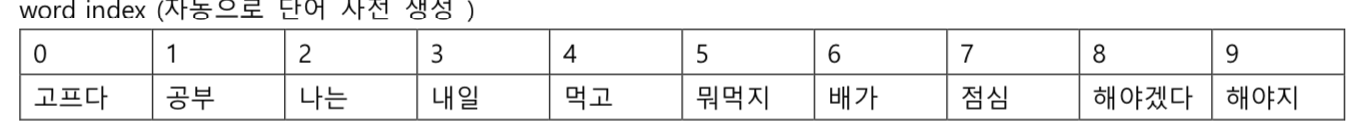

In [19]:
Image ("./word index.png")
# 자동으로 단어 사전 생성 

In [20]:
sentence = ['나는 배가 배가 고프다']
count_vectorizer1 = count_vectorizer.transform(sentence).toarray()

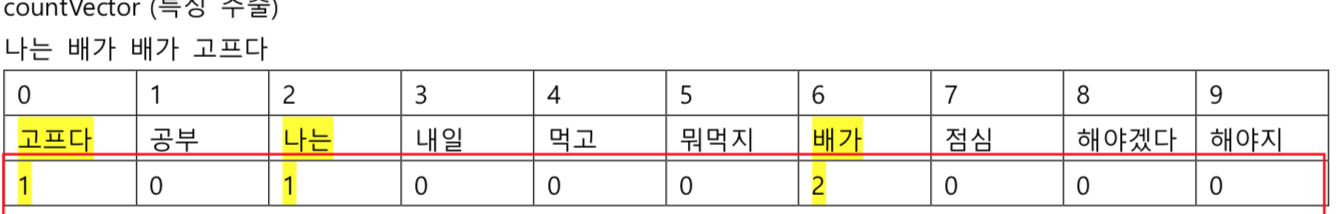

In [21]:
Image ("./countVector.png")
# 특징 추출

In [22]:
print(count_vectorizer1)

[[1 0 1 0 0 0 2 0 0 0]]


In [23]:
#2. TfidfVectorizer

TF (Term Frequencey)

DF (Document Frequency)

IDF (Inverse Document Frequency): DF의 역수. 특정 단어가 다른 데이터에 등장하지 않을 수록 값이 커짐

TF-IDF: TF * IDF 어떤 단어가 해당 문서에 자주 등장하지만, 다른 문서에는 많이 없는 단어 일수록 높은 값. 조사나 지시 대명사처럼 자주 등장하는 단어는 TF 값은 크지만, IDF값은 작아지므로,CountVectorizer의 단점을 해결

In [24]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [25]:
text_data = ['나는 배가 고프다', '내일 점심 뭐먹지','내일 공부 해야겠다', '점심 먹고 공부 해야지']

In [26]:
tfidf_vectorizer = TfidfVectorizer()

In [28]:
# 자동으로 단어 사전 생성
tfidf_vectorizer.fit(text_data)

TfidfVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.float64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1), norm='l2', preprocessor=None, smooth_idf=True,
        stop_words=None, strip_accents=None, sublinear_tf=False,
        token_pattern='(?u)\\b\\w\\w+\\b', tokenizer=None, use_idf=True,
        vocabulary=None)

In [30]:
print(tfidf_vectorizer.vocabulary_)

{'나는': 2, '배가': 6, '고프다': 0, '내일': 3, '점심': 7, '뭐먹지': 5, '공부': 1, '해야겠다': 8, '먹고': 4, '해야지': 9}


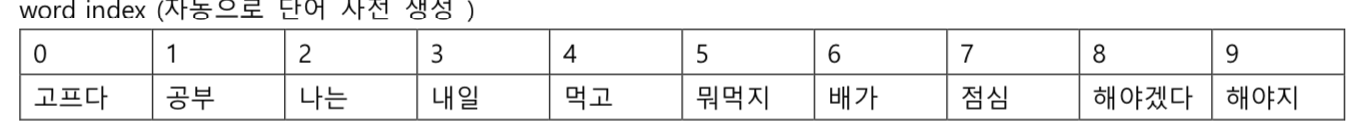

In [33]:
Image ('./word index.png')

In [31]:
sentence = [text_data[3]]
print(sentence)

['점심 먹고 공부 해야지']


In [32]:
print(tfidf_vectorizer.transform(text_data).toarray())

[[0.57735027 0.         0.57735027 0.         0.         0.
  0.57735027 0.         0.         0.        ]
 [0.         0.         0.         0.52640543 0.         0.66767854
  0.         0.52640543 0.         0.        ]
 [0.         0.52640543 0.         0.52640543 0.         0.
  0.         0.         0.66767854 0.        ]
 [0.         0.43779123 0.         0.         0.55528266 0.
  0.         0.43779123 0.         0.55528266]]


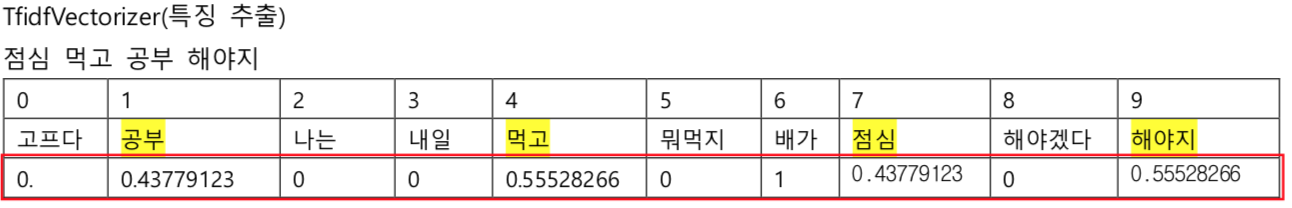

In [34]:
Image ('./tfidfVectorizer.png')

이 문장에서 자주 등장하고 다른 문장에서는 등장하지 않는 단어! (이 문장에서 중요한 단어)

# 단어표현

1. One hot encoding

2. Word Embedding / word vector

In [35]:
# 1. 원-핫 인코딩

각 단어의 인덱스를 정한 후, 그 단어의 벡터를 그 단어에 해당하는 인덱스의 값을 1로 표현하는 방식. 매우 간단하고 이해하기 쉽다는 장점이 있음. 카운트와 다르고 여러번 등장해도 1로 표현한다.

문제점은 단어의 벡터의 크기가 너무 크고, 값이 희소하다는 문제점이 있다. 단어 벡터가 단어의 의미나 특성을 전혀 표현할 수 없다는 점

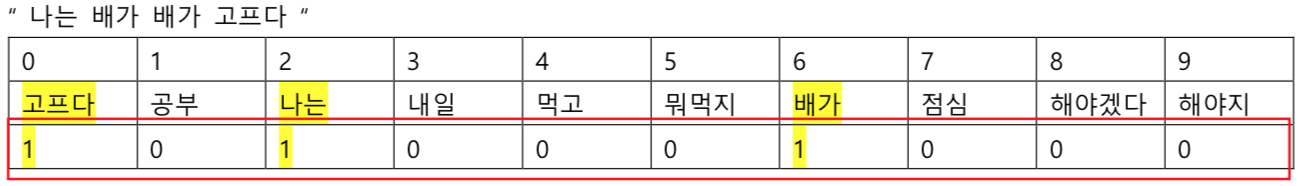

In [36]:
Image ('./onehotencoding.png')

In [69]:
# one-hot encoding with Keras
from keras.preprocessing.text import Tokenizer

In [76]:
samples = ['The cat sat on the mat.', 'The dog ate my homework.']

In [77]:
# 가장 빈도가 높은 1000개의 단어만 선택하도록 Tokenizer 객체 생성
tokenizer = Tokenizer (num_words = 1000)

In [78]:
# 단어 인덱스를 구축
tokenizer.fit_on_texts (samples)

In [79]:
print ("index_word :", tokenizer.index_word)

index_word : {1: 'the', 2: 'cat', 3: 'sat', 4: 'on', 5: 'mat', 6: 'dog', 7: 'ate', 8: 'my', 9: 'homework'}


In [80]:
print("word_index : ", tokenizer.word_index)

word_index :  {'the': 1, 'cat': 2, 'sat': 3, 'on': 4, 'mat': 5, 'dog': 6, 'ate': 7, 'my': 8, 'homework': 9}


In [82]:
print('단어 출현 빈도수 : ', tokenizer.index_docs)

# 단어가 몇개의 문장에 들어가 있는지 확인 

단어 출현 빈도수 :  defaultdict(<class 'int'>, {2: 1, 1: 2, 4: 1, 5: 1, 3: 1, 7: 1, 6: 1, 9: 1, 8: 1})


In [83]:
print('문장 수: ', tokenizer.document_count)

문장 수:  2


In [85]:
# 문자열을 정수 인덱스의 리스트로 변환
sequences = tokenizer.texts_to_sequences (samples)
print ('sequences', sequences)

sequences [[1, 2, 3, 4, 1, 5], [1, 6, 7, 8, 9]]
